cleandata

In [1]:
import pandas as pd

# โหลดไฟล์ CSV (เปลี่ยนชื่อไฟล์ตามจริง)
df = pd.read_csv(r"C:\Users\Win11\OneDrive - Walailak University\Documents\JupyterProject\machine_ประมง.csv")

ดูข้อมูลเบื้องต้น


In [2]:
print(df.head())

     ปี   เดือน ประเภทการทำการประมง       เครื่องมือ             ขนาดเรือ  \
0  2566  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่  น้อยกว่า 30 ตันกรอส   
1  2566  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่  น้อยกว่า 30 ตันกรอส   
2  2566  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่  น้อยกว่า 30 ตันกรอส   
3  2566  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่  น้อยกว่า 30 ตันกรอส   
4  2566  มกราคม             พาณิชย์  อวนลากแผ่นตะเฆ่  น้อยกว่า 30 ตันกรอส   

  พื้นที่ทำการประมง  ชนิดสัตว์น้ำ  ปริมาณ(ตัน)  มูลค่า(พันบาท)  
0          อันดามัน  ปลาน้ำดอกไม้          1.0            56.0  
1          อันดามัน        ปลาจวด          1.0            47.0  
2          อันดามัน    ปลาทรายแดง          3.0           160.0  
3          อันดามัน    ปลาทรายขาว          1.0            35.0  
4          อันดามัน      ปลาปากคม          6.0           194.0  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14730 entries, 0 to 14729
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ปี                   14730 non-null  int64  
 1   เดือน                14730 non-null  object 
 2   ประเภทการทำการประมง  14730 non-null  object 
 3   เครื่องมือ           14730 non-null  object 
 4   ขนาดเรือ             14730 non-null  object 
 5   พื้นที่ทำการประมง    14730 non-null  object 
 6   ชนิดสัตว์น้ำ         14730 non-null  object 
 7   ปริมาณ(ตัน)          14730 non-null  float64
 8   มูลค่า(พันบาท)       14730 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.0+ MB
None


In [4]:
print(df.describe())

            ปี   ปริมาณ(ตัน)  มูลค่า(พันบาท)
count  14730.0  14730.000000    14730.000000
mean    2566.0     91.752682     4788.692555
std        0.0    438.288643    19052.113469
min     2566.0      0.010000        0.080000
25%     2566.0      1.310000      113.160000
50%     2566.0      7.000000      473.035000
75%     2566.0     39.000000     2761.000000
max     2566.0  14704.000000   539708.520000


ไม่มี missing value

จัดการทำ Cateegorical data handling

In [5]:
import sklearn as sk

In [6]:
from sklearn.preprocessing import LabelEncoder

label Encoder month

In [7]:
df['เดือน'].unique()

array(['มกราคม', 'กุมภาพันธ์', 'มีนาคม', 'เมษายน', 'พฤษภาคม', 'มิถุนายน',
       'กรกฎาคม', 'สิงหาคม', 'กันยายน', 'ตุลาคม', 'พฤศจิกายน', 'ธันวาคม'],
      dtype=object)

In [8]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [9]:
month_map = {
    'มกราคม': 1, 'กุมภาพันธ์': 2, 'มีนาคม': 3, 'เมษายน': 4,
    'พฤษภาคม': 5, 'มิถุนายน': 6, 'กรกฎาคม': 7, 'สิงหาคม': 8,
    'กันยายน': 9, 'ตุลาคม': 10, 'พฤศจิกายน': 11, 'ธันวาคม': 12
}
df['เดือน'] = df['เดือน'].map(month_map)

In [10]:
le = LabelEncoder()
df['เดือน_encoded'] = le.fit_transform(df['เดือน'])

In [11]:
print(df[['เดือน', 'เดือน_encoded']].head(12))

    เดือน  เดือน_encoded
0       1              0
1       1              0
2       1              0
3       1              0
4       1              0
5       1              0
6       1              0
7       1              0
8       1              0
9       1              0
10      1              0
11      1              0


In [12]:
df['เดือน'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

ทำ One hot Encoder column ประเภทการทำการประมง

In [13]:
print(df['ประเภทการทำการประมง'].unique())

['พาณิชย์' 'พื้นบ้าน']


In [14]:
le = LabelEncoder()
df['ประเภทการทำการประมง_label'] = le.fit_transform(df['ประเภทการทำการประมง'])

In [15]:
print(df[['ประเภทการทำการประมง', 'ประเภทการทำการประมง_label']].head())

  ประเภทการทำการประมง  ประเภทการทำการประมง_label
0             พาณิชย์                          0
1             พาณิชย์                          0
2             พาณิชย์                          0
3             พาณิชย์                          0
4             พาณิชย์                          0


พาณิชย์ → 0 ,
พื้นบ้าน → 1

In [16]:
df.head()

,ปี,เดือน,ประเภทการทำการประมง,เครื่องมือ,ขนาดเรือ,พื้นที่ทำการประมง,ชนิดสัตว์น้ำ,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label
0,2566,1,พาณิชย์,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาน้ำดอกไม้,1.0,56.0,0,0
1,2566,1,พาณิชย์,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาจวด,1.0,47.0,0,0
2,2566,1,พาณิชย์,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาทรายแดง,3.0,160.0,0,0
3,2566,1,พาณิชย์,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาทรายขาว,1.0,35.0,0,0
4,2566,1,พาณิชย์,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาปากคม,6.0,194.0,0,0


In [17]:
# ลบคอลัมน์ 'เดือน' และ 'ประเภทการทำการประมง'
df = df.drop(columns=['เดือน', 'ประเภทการทำการประมง'])


One hot เครื่องมือประมง

In [18]:
# ตรวจสอบผลลัพธ์
df.head()


,ปี,เครื่องมือ,ขนาดเรือ,พื้นที่ทำการประมง,ชนิดสัตว์น้ำ,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label
0,2566,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาน้ำดอกไม้,1.0,56.0,0,0
1,2566,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาจวด,1.0,47.0,0,0
2,2566,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาทรายแดง,3.0,160.0,0,0
3,2566,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาทรายขาว,1.0,35.0,0,0
4,2566,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาปากคม,6.0,194.0,0,0


In [19]:
print(df['เครื่องมือ'].unique())

['อวนลากแผ่นตะเฆ่' 'อวนลากคู่' 'อวนลากคานถ่าง' 'อวนล้อมจับ'
 'อวนล้อมจับปลากะตัก' 'อวนครอบปลากะตัก' 'อวนครอบหมึก' 'อวนช้อนปลาจะละเม็ด'
 'อวนช้อน/ยกปลากะตัก' 'ลอบหมึก' 'ลอบหมึกสาย' 'ลอบปลา' 'ลอบปู' 'คราดหอยลาย'
 'คราดหอยอื่น' 'อวนลอยปลา' 'อวนจมปู' 'อวนติดตาอื่นๆ' 'แผงยกปูจักจั่น'
 'เบ็ดมือ' 'เบ็ดราว' 'อวนรุนเคย' 'อวนจมกุ้ง' 'เครื่องมืออื่นๆ'
 'สวิงช้อนแมงกะพรุน' 'อวนติดตาปลาทู' 'อวนติดตาปลาหลังเขียว']


In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
one_hot_encoding = OneHotEncoder(sparse_output=False)
one_hot_encoding

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [22]:
เครื่องมือ_encoded = one_hot_encoding.fit_transform(df[['เครื่องมือ']])
เครื่องมือ_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(14730, 27))

In [23]:
new_column_names = one_hot_encoding.get_feature_names_out()
new_column_names

array(['เครื่องมือ_คราดหอยลาย', 'เครื่องมือ_คราดหอยอื่น',
       'เครื่องมือ_ลอบปลา', 'เครื่องมือ_ลอบปู', 'เครื่องมือ_ลอบหมึก',
       'เครื่องมือ_ลอบหมึกสาย', 'เครื่องมือ_สวิงช้อนแมงกะพรุน',
       'เครื่องมือ_อวนครอบปลากะตัก', 'เครื่องมือ_อวนครอบหมึก',
       'เครื่องมือ_อวนจมกุ้ง', 'เครื่องมือ_อวนจมปู',
       'เครื่องมือ_อวนช้อน/ยกปลากะตัก', 'เครื่องมือ_อวนช้อนปลาจะละเม็ด',
       'เครื่องมือ_อวนติดตาปลาทู', 'เครื่องมือ_อวนติดตาปลาหลังเขียว',
       'เครื่องมือ_อวนติดตาอื่นๆ', 'เครื่องมือ_อวนรุนเคย',
       'เครื่องมือ_อวนลอยปลา', 'เครื่องมือ_อวนลากคานถ่าง',
       'เครื่องมือ_อวนลากคู่', 'เครื่องมือ_อวนลากแผ่นตะเฆ่',
       'เครื่องมือ_อวนล้อมจับ', 'เครื่องมือ_อวนล้อมจับปลากะตัก',
       'เครื่องมือ_เครื่องมืออื่นๆ', 'เครื่องมือ_เบ็ดมือ',
       'เครื่องมือ_เบ็ดราว', 'เครื่องมือ_แผงยกปูจักจั่น'], dtype=object)

In [24]:
temp = df.copy()

In [25]:
temp[new_column_names] = เครื่องมือ_encoded.astype(int)
temp.head()

,ปี,เครื่องมือ,ขนาดเรือ,พื้นที่ทำการประมง,ชนิดสัตว์น้ำ,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,...,เครื่องมือ_อวนลอยปลา,เครื่องมือ_อวนลากคานถ่าง,เครื่องมือ_อวนลากคู่,เครื่องมือ_อวนลากแผ่นตะเฆ่,เครื่องมือ_อวนล้อมจับ,เครื่องมือ_อวนล้อมจับปลากะตัก,เครื่องมือ_เครื่องมืออื่นๆ,เครื่องมือ_เบ็ดมือ,เครื่องมือ_เบ็ดราว,เครื่องมือ_แผงยกปูจักจั่น
0,2566,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาน้ำดอกไม้,1.0,56.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2566,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาจวด,1.0,47.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2566,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาทรายแดง,3.0,160.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2566,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาทรายขาว,1.0,35.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2566,อวนลากแผ่นตะเฆ่,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาปากคม,6.0,194.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
#drop the original 'Precipitation' column
temp.drop('เครื่องมือ', axis=1, inplace=True)

In [27]:
temp.head()

,ปี,ขนาดเรือ,พื้นที่ทำการประมง,ชนิดสัตว์น้ำ,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,...,เครื่องมือ_อวนลอยปลา,เครื่องมือ_อวนลากคานถ่าง,เครื่องมือ_อวนลากคู่,เครื่องมือ_อวนลากแผ่นตะเฆ่,เครื่องมือ_อวนล้อมจับ,เครื่องมือ_อวนล้อมจับปลากะตัก,เครื่องมือ_เครื่องมืออื่นๆ,เครื่องมือ_เบ็ดมือ,เครื่องมือ_เบ็ดราว,เครื่องมือ_แผงยกปูจักจั่น
0,2566,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาน้ำดอกไม้,1.0,56.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2566,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาจวด,1.0,47.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2566,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาทรายแดง,3.0,160.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2566,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาทรายขาว,1.0,35.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2566,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาปากคม,6.0,194.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


One hot ขนาดเรือ

In [28]:
one_hot_encoding = OneHotEncoder(sparse_output=False)
one_hot_encoding

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [29]:
temp['ขนาดเรือ'].unique()

array(['น้อยกว่า 30 ตันกรอส', 'ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส',
       'ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส',
       'ตั้งแต่ 150 ตันกรอสขึ้นไป', 'น้อยกว่า 10 ตันกรอส'], dtype=object)

In [30]:
encoded = one_hot_encoding.fit_transform(temp[['ขนาดเรือ']]).astype(int)
encoded[:5]

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [31]:
col_names = one_hot_encoding.get_feature_names_out()
col_names

array(['ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป',
       'ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส',
       'ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส',
       'ขนาดเรือ_น้อยกว่า 10 ตันกรอส', 'ขนาดเรือ_น้อยกว่า 30 ตันกรอส'],
      dtype=object)

In [32]:
# Append the encoded columns
temp[col_names] = encoded
temp.head()

,ปี,ขนาดเรือ,พื้นที่ทำการประมง,ชนิดสัตว์น้ำ,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,...,เครื่องมือ_อวนล้อมจับปลากะตัก,เครื่องมือ_เครื่องมืออื่นๆ,เครื่องมือ_เบ็ดมือ,เครื่องมือ_เบ็ดราว,เครื่องมือ_แผงยกปูจักจั่น,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส
0,2566,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาน้ำดอกไม้,1.0,56.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2566,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาจวด,1.0,47.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2566,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาทรายแดง,3.0,160.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2566,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาทรายขาว,1.0,35.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2566,น้อยกว่า 30 ตันกรอส,อันดามัน,ปลาปากคม,6.0,194.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
# Drop the original column
temp = temp.drop(['ขนาดเรือ'], axis=1)

In [34]:
temp.head()

,ปี,พื้นที่ทำการประมง,ชนิดสัตว์น้ำ,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,...,เครื่องมือ_อวนล้อมจับปลากะตัก,เครื่องมือ_เครื่องมืออื่นๆ,เครื่องมือ_เบ็ดมือ,เครื่องมือ_เบ็ดราว,เครื่องมือ_แผงยกปูจักจั่น,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส
0,2566,อันดามัน,ปลาน้ำดอกไม้,1.0,56.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2566,อันดามัน,ปลาจวด,1.0,47.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2566,อันดามัน,ปลาทรายแดง,3.0,160.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2566,อันดามัน,ปลาทรายขาว,1.0,35.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2566,อันดามัน,ปลาปากคม,6.0,194.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# All column names
temp.columns

Index(['ปี', 'พื้นที่ทำการประมง', 'ชนิดสัตว์น้ำ', 'ปริมาณ(ตัน)',
       'มูลค่า(พันบาท)', 'เดือน_encoded', 'ประเภทการทำการประมง_label',
       'เครื่องมือ_คราดหอยลาย', 'เครื่องมือ_คราดหอยอื่น', 'เครื่องมือ_ลอบปลา',
       'เครื่องมือ_ลอบปู', 'เครื่องมือ_ลอบหมึก', 'เครื่องมือ_ลอบหมึกสาย',
       'เครื่องมือ_สวิงช้อนแมงกะพรุน', 'เครื่องมือ_อวนครอบปลากะตัก',
       'เครื่องมือ_อวนครอบหมึก', 'เครื่องมือ_อวนจมกุ้ง', 'เครื่องมือ_อวนจมปู',
       'เครื่องมือ_อวนช้อน/ยกปลากะตัก', 'เครื่องมือ_อวนช้อนปลาจะละเม็ด',
       'เครื่องมือ_อวนติดตาปลาทู', 'เครื่องมือ_อวนติดตาปลาหลังเขียว',
       'เครื่องมือ_อวนติดตาอื่นๆ', 'เครื่องมือ_อวนรุนเคย',
       'เครื่องมือ_อวนลอยปลา', 'เครื่องมือ_อวนลากคานถ่าง',
       'เครื่องมือ_อวนลากคู่', 'เครื่องมือ_อวนลากแผ่นตะเฆ่',
       'เครื่องมือ_อวนล้อมจับ', 'เครื่องมือ_อวนล้อมจับปลากะตัก',
       'เครื่องมือ_เครื่องมืออื่นๆ', 'เครื่องมือ_เบ็ดมือ',
       'เครื่องมือ_เบ็ดราว', 'เครื่องมือ_แผงยกปูจักจั่น',
       'ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป',
       'ขนาดเร

One hot พื้นที่ทำการประมง

In [36]:
one_hot_encoding = OneHotEncoder(sparse_output=False)
one_hot_encoding

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [37]:
temp['พื้นที่ทำการประมง'].unique()

array(['อันดามัน', 'อ่าวไทย', 'นอกน่านน้ำ'], dtype=object)

In [38]:
encoded = one_hot_encoding.fit_transform(temp[['พื้นที่ทำการประมง']]).astype(int)
encoded[:5]

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [39]:
col_names = one_hot_encoding.get_feature_names_out()
col_names

array(['พื้นที่ทำการประมง_นอกน่านน้ำ', 'พื้นที่ทำการประมง_อันดามัน',
       'พื้นที่ทำการประมง_อ่าวไทย'], dtype=object)

In [40]:
# Append the encoded columns
temp[col_names] = encoded
temp.head()

,ปี,พื้นที่ทำการประมง,ชนิดสัตว์น้ำ,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,...,เครื่องมือ_เบ็ดราว,เครื่องมือ_แผงยกปูจักจั่น,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส,พื้นที่ทำการประมง_นอกน่านน้ำ,พื้นที่ทำการประมง_อันดามัน,พื้นที่ทำการประมง_อ่าวไทย
0,2566,อันดามัน,ปลาน้ำดอกไม้,1.0,56.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2566,อันดามัน,ปลาจวด,1.0,47.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2566,อันดามัน,ปลาทรายแดง,3.0,160.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2566,อันดามัน,ปลาทรายขาว,1.0,35.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2566,อันดามัน,ปลาปากคม,6.0,194.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [41]:
# Drop the original column
temp = temp.drop(['พื้นที่ทำการประมง'], axis=1)

In [42]:
temp.head()

,ปี,ชนิดสัตว์น้ำ,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,เครื่องมือ_ลอบปู,...,เครื่องมือ_เบ็ดราว,เครื่องมือ_แผงยกปูจักจั่น,ขนาดเรือ_ตั้งแต่ 150 ตันกรอสขึ้นไป,ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตันกรอส,ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตันกรอส,ขนาดเรือ_น้อยกว่า 10 ตันกรอส,ขนาดเรือ_น้อยกว่า 30 ตันกรอส,พื้นที่ทำการประมง_นอกน่านน้ำ,พื้นที่ทำการประมง_อันดามัน,พื้นที่ทำการประมง_อ่าวไทย
0,2566,ปลาน้ำดอกไม้,1.0,56.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2566,ปลาจวด,1.0,47.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2566,ปลาทรายแดง,3.0,160.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2566,ปลาทรายขาว,1.0,35.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2566,ปลาปากคม,6.0,194.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


One hot ชนิดสัตว์น้ำ

In [43]:
one_hot_encoding = OneHotEncoder(sparse_output=False)
one_hot_encoding

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [44]:
temp['ชนิดสัตว์น้ำ'].unique()

array(['ปลาน้ำดอกไม้', 'ปลาจวด', 'ปลาทรายแดง', 'ปลาทรายขาว', 'ปลาปากคม',
       'ปลาดาบเงิน', 'ปลาลิ้นหมา', 'ปลาเลยหน้าดิน', 'ปลาเป็ด',
       'กุ้งกุลาลาย', 'กุ้งโอคัก', 'กุ้งอื่นๆ', 'ปูม้า', 'ปูอื่นๆ',
       'หมึกกล้วย', 'หมึกกระดอง', 'หมึกสาย', 'ปลาสีกุน', 'ปลากะพงแดง',
       'ปลาตาโต', 'ปลากดทะเล', 'ปลากระเบน', 'ปลายอดจาก', 'ปลาเก๋า',
       'กุ้งแชบ๊วย', 'กั้งไข่', 'หอยเชลล์', 'หอยอื่นๆ', 'ปลาแข้งไก่',
       'ปลาเห็ดโคน', 'ปลาดุกทะเล', 'ปลาทูแขก', 'ปลาหลังเขียว',
       'ปลาเลยผิวน้ำ', 'ปลาสีกุนตาโต', 'ปลาทู', 'ปลาดาบลาว', 'ปลาสำลี',
       'ปลาจะละเม็ดดำ', 'สัตว์น้ำอื่นๆ', 'ปลาลัง', 'ปลาอินทรี',
       'ปลากะตัก', 'ปลากุเรา', 'ปลากระบอก', 'หมึกหอม', 'ปลาโอลาย',
       'ปลากระโทงแทง', 'ปลาจะละเม็ดขาว', 'ปลาฉลาม', 'ปลาจักรผาน',
       'กุ้งกุลาดำ', 'หอยแครง', 'ปลาโอดำ', 'ปลาโอหลอด', 'ปลากระโทงแทงร่ม',
       'ปลาทูน่าท้องแถบ', 'ปลาโอแกลบ', 'ปลาทูน่า', 'หอยลาย', 'กั้งกระดาน',
       'ปูจักจั่น', 'ปูทะเล', 'เคย', 'กุ้งเหลือง', 'ปลากะพงขาว',
       'หอยแมลงภู่', 'แมงกะพรุน', 'หอยกะ

In [45]:
encoded = one_hot_encoding.fit_transform(temp[['ชนิดสัตว์น้ำ']]).astype(int)
encoded[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0,

In [46]:
col_names = one_hot_encoding.get_feature_names_out()
col_names

array(['ชนิดสัตว์น้ำ_กั้งกระดาน', 'ชนิดสัตว์น้ำ_กั้งไข่',
       'ชนิดสัตว์น้ำ_กุ้งกุลาดำ', 'ชนิดสัตว์น้ำ_กุ้งกุลาลาย',
       'ชนิดสัตว์น้ำ_กุ้งอื่นๆ', 'ชนิดสัตว์น้ำ_กุ้งเหลือง',
       'ชนิดสัตว์น้ำ_กุ้งแชบ๊วย', 'ชนิดสัตว์น้ำ_กุ้งโอคัก',
       'ชนิดสัตว์น้ำ_ปลากดทะเล', 'ชนิดสัตว์น้ำ_ปลากระบอก',
       'ชนิดสัตว์น้ำ_ปลากระเบน', 'ชนิดสัตว์น้ำ_ปลากระโทงแทง',
       'ชนิดสัตว์น้ำ_ปลากระโทงแทงร่ม', 'ชนิดสัตว์น้ำ_ปลากะตัก',
       'ชนิดสัตว์น้ำ_ปลากะพงขาว', 'ชนิดสัตว์น้ำ_ปลากะพงแดง',
       'ชนิดสัตว์น้ำ_ปลากุเรา', 'ชนิดสัตว์น้ำ_ปลาจวด',
       'ชนิดสัตว์น้ำ_ปลาจะละเม็ดขาว', 'ชนิดสัตว์น้ำ_ปลาจะละเม็ดดำ',
       'ชนิดสัตว์น้ำ_ปลาจักรผาน', 'ชนิดสัตว์น้ำ_ปลาฉลาม',
       'ชนิดสัตว์น้ำ_ปลาดาบลาว', 'ชนิดสัตว์น้ำ_ปลาดาบเงิน',
       'ชนิดสัตว์น้ำ_ปลาดุกทะเล', 'ชนิดสัตว์น้ำ_ปลาตาโต',
       'ชนิดสัตว์น้ำ_ปลาทรายขาว', 'ชนิดสัตว์น้ำ_ปลาทรายแดง',
       'ชนิดสัตว์น้ำ_ปลาทู', 'ชนิดสัตว์น้ำ_ปลาทูน่า',
       'ชนิดสัตว์น้ำ_ปลาทูน่าท้องแถบ', 'ชนิดสัตว์น้ำ_ปลาทูแขก',
       'ชนิดสัตว์น้ำ_ปลาน้ำดอกไม้', 

In [47]:
# Append the encoded columns
temp[col_names] = encoded
temp.head()

C:\Users\Win11\AppData\Local\Temp\ipykernel_12896\4138593674.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp[col_names] = encoded
C:\Users\Win11\AppData\Local\Temp\ipykernel_12896\4138593674.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp[col_names] = encoded
C:\Users\Win11\AppData\Local\Temp\ipykernel_12896\4138593674.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

,ปี,ชนิดสัตว์น้ำ,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,เครื่องมือ_ลอบปู,...,ชนิดสัตว์น้ำ_หมึกหอม,ชนิดสัตว์น้ำ_หอยกะพง,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน
0,2566,ปลาน้ำดอกไม้,1.0,56.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2566,ปลาจวด,1.0,47.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2566,ปลาทรายแดง,3.0,160.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2566,ปลาทรายขาว,1.0,35.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2566,ปลาปากคม,6.0,194.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Drop the original column
temp = temp.drop(['ชนิดสัตว์น้ำ'], axis=1)

In [49]:
temp.head()

,ปี,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,เครื่องมือ_ลอบปู,เครื่องมือ_ลอบหมึก,...,ชนิดสัตว์น้ำ_หมึกหอม,ชนิดสัตว์น้ำ_หอยกะพง,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน
0,2566,1.0,56.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2566,1.0,47.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2566,3.0,160.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2566,1.0,35.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2566,6.0,194.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# เซฟ DataFrame เป็นไฟล์ CSV
temp.to_csv("handlingEncoder.csv", index=False)

In [51]:
temp.describe()

,ปี,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,เครื่องมือ_ลอบปู,เครื่องมือ_ลอบหมึก,...,ชนิดสัตว์น้ำ_หมึกหอม,ชนิดสัตว์น้ำ_หอยกะพง,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน
count,14730.0,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000,...,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000,14730.000000
mean,2566.0,91.752682,4788.692555,5.357502,0.355804,0.003394,0.002716,0.047997,0.016090,0.016022,...,0.017787,0.000543,0.000611,0.002648,0.008486,0.006857,0.004277,0.000475,0.002987,0.001494
std,0.0,438.288643,19052.113469,3.454695,0.478773,0.058165,0.052042,0.213768,0.125825,0.125563,...,0.132180,0.023299,0.024712,0.051389,0.091731,0.082524,0.065261,0.021795,0.054575,0.038619
min,2566.0,0.010000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2566.0,1.310000,113.160000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2566.0,7.000000,473.035000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2566.0,39.000000,2761.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2566.0,14704.000000,539708.520000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Drop the year column เพราะมีปีเดียวเเละไม่ได้เอาไปประมวลผล

ทำ Feature Scalling

In [52]:
# Standardization (Z-Score Normalization)
from sklearn.preprocessing import StandardScaler

In [53]:
# Load the dataset
df = pd.read-_csv("handlingEncoder.csv")
df.drop('ปี', axis=1, inplace=True)
df.head()

,ปริมาณ(ตัน),มูลค่า(พันบาท),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,เครื่องมือ_ลอบปู,เครื่องมือ_ลอบหมึก,เครื่องมือ_ลอบหมึกสาย,...,ชนิดสัตว์น้ำ_หมึกหอม,ชนิดสัตว์น้ำ_หอยกะพง,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน
0,1.0,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,47.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,160.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,35.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.0,194.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
label_col = "มูลค่า(พันบาท)"
X = df.drop(columns=[label_col])
y = df[label_col]

In [55]:
# ทำ Scaler เฉพาะ Feature
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# เพิ่ม: บันทึก Scaler สำหรับใช้ในการ Deploy
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [56]:
# แปลงกลับเป็น DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

In [57]:
# ต่อ Label กลับเข้าไป
scaled_df[label_col] = y

In [58]:
scaled_df.describe()

,ปริมาณ(ตัน),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,เครื่องมือ_ลอบปู,เครื่องมือ_ลอบหมึก,เครื่องมือ_ลอบหมึกสาย,เครื่องมือ_สวิงช้อนแมงกะพรุน,...,ชนิดสัตว์น้ำ_หอยกะพง,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน,มูลค่า(พันบาท)
count,1.473000e+04,14730.000000,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,...,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,1.473000e+04,14730.000000
mean,-1.543609e-17,0.000000,-1.234888e-16,3.859024e-18,5.788536e-18,-1.003346e-16,-3.859024e-17,4.244926e-17,-3.569597e-17,1.543609e-17,...,-9.647559e-18,1.929512e-18,-1.929512e-18,-1.929512e-17,7.718047e-18,3.666072e-17,7.718047e-18,-1.736561e-17,1.543609e-17,4788.692555
std,1.000034e+00,1.000034,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,...,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,19052.113469
min,-2.093273e-01,-1.550841,-7.431849e-01,-5.836090e-02,-5.218181e-02,-2.245377e-01,-1.278778e-01,-1.276033e-01,-5.777237e-02,-3.867537e-02,...,-2.331104e-02,-2.472593e-02,-5.152365e-02,-9.251331e-02,-8.309088e-02,-6.553897e-02,-2.180474e-02,-5.473619e-02,-3.867537e-02,0.080000
25%,-2.063612e-01,-0.971899,-7.431849e-01,-5.836090e-02,-5.218181e-02,-2.245377e-01,-1.278778e-01,-1.276033e-01,-5.777237e-02,-3.867537e-02,...,-2.331104e-02,-2.472593e-02,-5.152365e-02,-9.251331e-02,-8.309088e-02,-6.553897e-02,-2.180474e-02,-5.473619e-02,-3.867537e-02,113.160000
50%,-1.933784e-01,-0.103486,-7.431849e-01,-5.836090e-02,-5.218181e-02,-2.245377e-01,-1.278778e-01,-1.276033e-01,-5.777237e-02,-3.867537e-02,...,-2.331104e-02,-2.472593e-02,-5.152365e-02,-9.251331e-02,-8.309088e-02,-6.553897e-02,-2.180474e-02,-5.473619e-02,-3.867537e-02,473.035000
75%,-1.203647e-01,0.764927,1.345560e+00,-5.836090e-02,-5.218181e-02,-2.245377e-01,-1.278778e-01,-1.276033e-01,-5.777237e-02,-3.867537e-02,...,-2.331104e-02,-2.472593e-02,-5.152365e-02,-9.251331e-02,-8.309088e-02,-6.553897e-02,-2.180474e-02,-5.473619e-02,-3.867537e-02,2761.000000
max,3.334046e+01,1.633340,1.345560e+00,1.713476e+01,1.916377e+01,4.453595e+00,7.819968e+00,7.836789e+00,1.730931e+01,2.585625e+01,...,4.289814e+01,4.044338e+01,1.940856e+01,1.080926e+01,1.203501e+01,1.525810e+01,4.586159e+01,1.826945e+01,2.585625e+01,539708.520000


In [59]:
# เซฟ DataFrame เป็นไฟล์ CSV
scaled_df.to_csv("afterScaler1.csv", index=False)

Algorith

GradientBoosting

In [60]:
# ===== Import =====
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import joblib
import json
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_regression

In [61]:
# โหลดไฟล์ CSV (เปลี่ยนชื่อไฟล์ตามจริง)
df = pd.read_csv("afterScaler1.csv")

In [62]:
df.head()

,ปริมาณ(ตัน),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,เครื่องมือ_ลอบปู,เครื่องมือ_ลอบหมึก,เครื่องมือ_ลอบหมึกสาย,เครื่องมือ_สวิงช้อนแมงกะพรุน,...,ชนิดสัตว์น้ำ_หอยกะพง,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน,มูลค่า(พันบาท)
0,-0.207068,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,56.0
1,-0.207068,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,47.0
2,-0.202505,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,160.0
3,-0.207068,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,35.0
4,-0.195660,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,194.0


In [63]:
# 2) แยก Features (X) และ Label (y)
X = df.drop("มูลค่า(พันบาท)", axis=1)   # Features
y = df["มูลค่า(พันบาท)"]               # Label

In [64]:
# 3) แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [65]:
print("Train set (X_train):", X_train.shape)
print("Train set (y_train):", y_train.shape)
print("Test set (X_test):", X_test.shape)
print("Test set (y_test):", y_test.shape)


Train set (X_train): (11784, 108)
Train set (y_train): (11784,)
Test set (X_test): (2946, 108)
Test set (y_test): (2946,)


xgboost

In [66]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [67]:
# 6) Train โมเดล
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [68]:
print("=== XGBoost ===")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

=== XGBoost ===
R² Score: 0.9764669569287155
MAE: 639.7350579633658
RMSE: 2556.2744847291224


Gradient Boosting

In [69]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=300,   # จำนวนต้นไม้
    learning_rate=0.1,  # อัตราการเรียนรู้
    max_depth=5,        # ความลึกของต้นไม้
    random_state=42
)

In [70]:
# 6) Train โมเดล
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [71]:

print("=== Gradient Boosting ===")
print("R² Score:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))

=== Gradient Boosting ===
R² Score: 0.9629611275410755
MAE: 513.6399061700353
RMSE: 3206.9878828988867


LightGBM

In [72]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [73]:
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 11784, number of used features: 102
[LightGBM] [Info] Start training from score 4842.212550


In [74]:
print("=== LightGBM ===")
print("R² Score:", r2_score(y_test, y_pred_lgb))
print("MAE:", mean_absolute_error(y_test, y_pred_lgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))

=== LightGBM ===
R² Score: 0.822923238848774
MAE: 1237.4437957791101
RMSE: 7012.118152752693


โมเดล xgboost ดีสุดจึงเหมาะนำมาจูนให้ได้ค่าดีที่สุด

In [75]:
from sklearn.model_selection import GridSearchCV

# สร้าง parameter grid
param_grid = {
    "n_estimators": [300, 500, 800],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}


In [76]:
# โมเดล XGB เบื้องต้น
xgb_tune = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

In [77]:
# ใช้ GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_tune,
    param_grid=param_grid,
    scoring="r2",
    cv=3,          # cross-validation 3 fold
    n_jobs=-1,
    verbose=2
)

In [78]:
# รันการค้นหาพารามิเตอร์
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.7, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [4, 6, ...], 'n_estimators': [300, 500, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [79]:
# แสดงผลลัพธ์
print("\n=== Best Parameters from GridSearch ===")
print(grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)


=== Best Parameters from GridSearch ===
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 800, 'subsample': 0.8}
Best CV R² Score: 0.9617903066558355


In [80]:
# ประเมินบน test set
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

In [81]:

print("\n=== XGBoost Tuned Model ===")
print("Test R²:", r2_score(y_test, y_pred_best))
print("Test MAE:", mean_absolute_error(y_test, y_pred_best))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))


=== XGBoost Tuned Model ===
Test R²: 0.9820630659039131
Test MAE: 612.0227041306945
Test RMSE: 2231.734599668268


หลังจากจูน XGBoost แล้ว โมเดลของคุณ ดีขึ้นชัดเจน บันทึกโมเดลที่จูนแล้ว

In [82]:
import joblib
joblib.dump(best_xgb, "xgb_tuned_model.pkl")

['xgb_tuned_model.pkl']

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = best_xgb.feature_importances_
fi_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values("Importance", ascending=False)

print(fi_df.head(10))  # ดู top 20 feature


                                              Feature  Importance
13                                 เครื่องมือ_อวนจมปู    0.272697
96                             ชนิดสัตว์น้ำ_หมึกกล้วย    0.108713
92                                 ชนิดสัตว์น้ำ_ปูม้า    0.105101
34                       ขนาดเรือ_น้อยกว่า 30 ตันกรอส    0.071987
12                               เครื่องมือ_อวนจมกุ้ง    0.051368
44                            ชนิดสัตว์น้ำ_กุ้งแชบ๊วย    0.041093
0                                         ปริมาณ(ตัน)    0.036661
81                               ชนิดสัตว์น้ำ_ปลาเป็ด    0.028316
32  ขนาดเรือ_ตั้งแต่ 60 ตันกรอส ถึงน้อยกว่า 150 ตั...    0.028263
31  ขนาดเรือ_ตั้งแต่ 30 ตันกรอส ถึงน้อยกว่า 60 ตัน...    0.020743


Neural Network Regressor

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import numpy as np
import joblib
import json
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_regression

In [85]:
# โหลดไฟล์ CSV (เปลี่ยนชื่อไฟล์ตามจริง)
df = pd.read_csv("afterScaler1.csv")

In [86]:
df.head()

,ปริมาณ(ตัน),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,เครื่องมือ_ลอบปู,เครื่องมือ_ลอบหมึก,เครื่องมือ_ลอบหมึกสาย,เครื่องมือ_สวิงช้อนแมงกะพรุน,...,ชนิดสัตว์น้ำ_หอยกะพง,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน,มูลค่า(พันบาท)
0,-0.207068,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,56.0
1,-0.207068,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,47.0
2,-0.202505,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,160.0
3,-0.207068,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,35.0
4,-0.195660,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,194.0


In [87]:
# 2) แยก Features (X) และ Label (y)
X = df.drop("มูลค่า(พันบาท)", axis=1)   # Features
y = df["มูลค่า(พันบาท)"]               # Label

In [88]:
# 3) แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [89]:
# ====== สร้าง Neural Network ======
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # ชั้น input
    Dense(64, activation='relu'),                                     # hidden layer
    Dense(32, activation='relu'),
    Dense(1)                                                           # output layer
])

C:\Users\Win11\PycharmProjects\JupyterProject\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
# ====== compile model ======
nn_model.compile(
    optimizer='adam',
    loss='mse',            # Mean Squared Error
    metrics=['mae']
)

In [91]:
# ====== Early stopping เพื่อลด overfitting ======
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [92]:
# ====== train model ======
history = nn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/200
295/295 - 1s - 5ms/step - loss: 374121920.0000 - mae: 4964.5337 - val_loss: 322446016.0000 - val_mae: 6646.5732
Epoch 2/200
295/295 - 0s - 2ms/step - loss: 302715520.0000 - mae: 5896.2642 - val_loss: 282580544.0000 - val_mae: 6228.9985
Epoch 3/200
295/295 - 1s - 3ms/step - loss: 269627200.0000 - mae: 5449.6943 - val_loss: 260625376.0000 - val_mae: 5935.9409
Epoch 4/200
295/295 - 1s - 2ms/step - loss: 252687968.0000 - mae: 5116.0767 - val_loss: 250764480.0000 - val_mae: 5571.0391
Epoch 5/200
295/295 - 0s - 1ms/step - loss: 242877856.0000 - mae: 4916.8633 - val_loss: 243585776.0000 - val_mae: 5012.4614
Epoch 6/200
295/295 - 0s - 2ms/step - loss: 235175280.0000 - mae: 4555.7939 - val_loss: 242223584.0000 - val_mae: 5263.0713
Epoch 7/200
295/295 - 1s - 2ms/step - loss: 231627840.0000 - mae: 4600.5884 - val_loss: 235909328.0000 - val_mae: 4776.2720
Epoch 8/200
295/295 - 1s - 2ms/step - loss: 226340080.0000 - mae: 4370.1650 - val_loss: 232909056.0000 - val_mae: 4707.8906
Epoch 9/

In [93]:
# ====== predict และประเมินผล ======
y_pred_nn = nn_model.predict(X_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [94]:
r2 = r2_score(y_test, y_pred_nn)
mae = mean_absolute_error(y_test, y_pred_nn)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn))

In [95]:
print("=== Neural Network ===")
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

=== Neural Network ===
R² Score: 0.9761407219663245
MAE: 1013.3095989137188
RMSE: 2573.932119412413


Neural Network + Hyperparameter Tuning

In [96]:
# ===== Neural Network + Hyperparameter Tuning =====
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import joblib

# 1) กำหนดโมเดลเบื้องต้น
mlp = MLPRegressor(
    random_state=42,
    max_iter=500
)


In [97]:
# 2) กำหนดช่วง Hyperparameter สำหรับ RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(100,), (100,50), (150,100,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.005, 0.01]
}

In [98]:
# 3) RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=20,        # ลอง 20 combination แบบสุ่ม
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)

In [99]:
# 4) เรียนรู้โมเดล
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,MLPRegressor(...ndom_state=42)
,param_distributions,"{'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001, ...], 'hidden_layer_sizes': [(100,), (100, ...), ...], 'learning_rate_init': [0.001, 0.005, ...], ...}"
,n_iter,20
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [100]:
# 5) โมเดลที่ดีที่สุด
best_mlp = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.005, 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001, 'activation': 'relu'}


In [101]:
# 6) ทำนายและประเมินผล
y_pred = best_mlp.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [102]:
print("=== Neural Network Tuned Model ===")
print("Test R²:", r2)
print("Test MAE:", mae)
print("Test RMSE:", rmse)

=== Neural Network Tuned Model ===
Test R²: 0.9867681094583038
Test MAE: 752.7464682256565
Test RMSE: 1916.8114287012183


In [103]:
# 7) บันทึกโมเดล
joblib.dump(best_mlp, "NeuralNetwork_tuned.pkl")

['NeuralNetwork_tuned.pkl']

สำหรับ Neural Network (เช่น Keras MLP) เราไม่มี feature_importances_ แบบตรง ๆ เหมือน Tree-based models แต่เราสามารถใช้ Permutation Importance หรือ SHAP เพื่อประเมินความสำคัญของ feature ได้
ถ้าจะง่าย ๆ เราใช้ Permutation Importance กับ scikit-learn wrapper ของ Kera

In [104]:
from sklearn.inspection import permutation_importance
import pandas as pd

# สมมติว่า nn_model คือ KerasRegressor ที่คุณฝึกแล้ว
# X_test, y_test คือข้อมูลทดสอบ

result = permutation_importance(
    nn_model, X_test, y_test, n_repeats=10, random_state=42, scoring='r2'
)

# สร้าง DataFrame
fi_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean
}).sort_values("Importance", ascending=False)

# ดู top 10
print(fi_df.head(10))


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
93/93 ━━━━━━━━━━━━

RandomForest

In [105]:
import joblib
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import joblib
import json

In [106]:
# โหลดไฟล์ CSV (เปลี่ยนชื่อไฟล์ตามจริง)
df = pd.read_csv("afterScaler1.csv")

In [107]:
df.head()

,ปริมาณ(ตัน),เดือน_encoded,ประเภทการทำการประมง_label,เครื่องมือ_คราดหอยลาย,เครื่องมือ_คราดหอยอื่น,เครื่องมือ_ลอบปลา,เครื่องมือ_ลอบปู,เครื่องมือ_ลอบหมึก,เครื่องมือ_ลอบหมึกสาย,เครื่องมือ_สวิงช้อนแมงกะพรุน,...,ชนิดสัตว์น้ำ_หอยกะพง,ชนิดสัตว์น้ำ_หอยนางรม,ชนิดสัตว์น้ำ_หอยลาย,ชนิดสัตว์น้ำ_หอยอื่นๆ,ชนิดสัตว์น้ำ_หอยเชลล์,ชนิดสัตว์น้ำ_หอยแครง,ชนิดสัตว์น้ำ_หอยแมลงภู่,ชนิดสัตว์น้ำ_เคย,ชนิดสัตว์น้ำ_แมงกะพรุน,มูลค่า(พันบาท)
0,-0.207068,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,56.0
1,-0.207068,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,47.0
2,-0.202505,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,160.0
3,-0.207068,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,35.0
4,-0.195660,-1.550841,-0.743185,-0.058361,-0.052182,-0.224538,-0.127878,-0.127603,-0.057772,-0.038675,...,-0.023311,-0.024726,-0.051524,-0.092513,-0.083091,-0.065539,-0.021805,-0.054736,-0.038675,194.0


In [108]:
# 2) แยก Features (X) และ Label (y)
X = df.drop("มูลค่า(พันบาท)", axis=1)   # Features
y = df["มูลค่า(พันบาท)"]               # Label

In [109]:
# 3) แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [110]:
print("Train set (X_train):", X_train.shape)
print("Train set (y_train):", y_train.shape)
print("Test set (X_test):", X_test.shape)
print("Test set (y_test):", y_test.shape)


Train set (X_train): (11784, 108)
Train set (y_train): (11784,)
Test set (X_test): (2946, 108)
Test set (y_test): (2946,)


In [111]:
# 5) สร้างโมเดล Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,       # จำนวนต้นไม้
    max_depth=None,         # ไม่มีจำกัดความลึก
    random_state=42,
    n_jobs=-1               # ใช้ทุก core
)


In [112]:
# 6) Train โมเดล
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [113]:
# 7) Predict
y_pred = rf_model.predict(X_test)

In [114]:
# 8) ประเมินผล
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [115]:
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)

R² Score: 0.9758657756153231
MAE: 429.43381714188723
RMSE: 2588.7202052284024


In [116]:
import joblib
import json

# ========= Save =========
# บันทึกโมเดล
joblib.dump(rf_model, "rf_model_baseline.pkl")

# บันทึกผลลัพธ์ (แทนค่าด้วยค่าที่คุณได้จริง ๆ)
results = {
    "R2": 0.9758657756153231,
    "MAE": 429.43381714188723,
    "RMSE": 2588.720205228403
}

with open("rf_baseline_results.json", "w") as f:
    json.dump(results, f)

print("✅ บันทึก rf_model และผลลัพธ์เรียบร้อยแล้ว")

✅ บันทึก rf_model และผลลัพธ์เรียบร้อยแล้ว


Hyperparameter Tuning

In [117]:
# โหลด baseline model
rf_model = joblib.load("rf_model_baseline.pkl")
print("โมเดลที่โหลดมา:", rf_model)

โมเดลที่โหลดมา: RandomForestRegressor(n_jobs=-1, random_state=42)


In [118]:
# โหลดผลลัพธ์
with open("rf_baseline_results.json", "r") as f:
    loaded_results = json.load(f)

print("ผลลัพธ์ที่โหลดมา:", loaded_results)

ผลลัพธ์ที่โหลดมา: {'R2': 0.9758657756153231, 'MAE': 429.43381714188723, 'RMSE': 2588.720205228403}


In [119]:
# นำเข้าโมดูลที่จำเป็น
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [120]:
param_grid = {
    'n_estimators': [200, 500],          # จำนวนต้นไม้ 2 ตัวเลือก
    'max_depth': [None, 20, 40],         # depth 3 ตัวเลือก
    'min_samples_split': [2, 5, 10],     # split 3 ตัวเลือก
    'min_samples_leaf': [1, 2, 4],       # leaf 3 ตัวเลือก
    'max_features': ['sqrt', 'log2']     # feature selection 2 ตัวเลือก
}

In [121]:
# ====== สร้าง GridSearchCV ======
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,                # cross-validation 3 fold
    n_jobs=-1,           # ใช้ทุก core
    verbose=2,
    scoring='r2'
)

In [122]:
# ====== เรียนรู้โมเดล ======
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 20, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [123]:
# ====== โมเดลที่ดีที่สุด ======
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [124]:

# ====== ทำนายและประเมินผล ======
y_pred = best_rf.predict(X_test)

In [125]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.9425486618297952
MAE: 875.3203226700308
RMSE: 3994.0961435768863


ค่า accuracy ได้น้อยกว่าเดิม จึงต้องแก้ Hyperparameters ใหม่ เพื่อให้ได้ค่า accuracy เพิ่มขึ้น

In [126]:
# กำหนดช่วงค่าของ Hyperparameters ใหม่ (สำหรับ tuning)
param_grid = {
    'n_estimators': [200, 500, 800, 1200],
    'max_depth': [None, 20, 40, 60, 80],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['sqrt', 'log2', 0.5]
}

In [127]:
# สร้าง GridSearchCV
# ใช้ baseline model เป็น estimator
# กำหนดโมเดลใหม่
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

In [128]:
# เรียนรู้โมเดล (tuning)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [None, 20, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


#### **ใช้ grid serch นานเกิน จึงเปลี่ยนไปใช้ random เพื่อลดเวลา เเต่มันก็อาจจะไม่ได้ตัวที่ดีที่สุด**

In [129]:
# ===== ใช้ baseline model ที่โหลดมา =====
rf_model = joblib.load("rf_model_baseline.pkl")

In [130]:
# ===== กำหนดช่วงค่า Hyperparameters สำหรับ RandomizedSearch =====
param_dist = {
    'n_estimators': [100, 200, 500, 800],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [131]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# ===== RandomizedSearchCV =====
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,            # ลอง 20 combination แบบสุ่ม
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='r2'
)

In [132]:
# ===== เรียนรู้โมเดล =====
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [133]:
# ===== โมเดลที่ดีที่สุด =====
best_rf = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}


In [134]:
# ===== ทำนายและประเมินผล =====
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [135]:
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.9445829369403567
MAE: 894.3697494599846
RMSE: 3922.746044875619


ค่า ค่าR² Score ลดลง จูนใหม่

In [136]:
# ===== ใช้ baseline model ที่โหลดมา =====
rf_model = joblib.load("rf_model_baseline.pkl")

In [137]:
# กำหนดช่วง Hyperparameters ใหม่
param_dist = {
    'n_estimators': [800, 1000, 1200],
    'max_depth': [None, 40, 50, 60],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.5]
}

In [138]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=25,     # เพิ่มจำนวนครั้งเพื่อค้นหาดีที่สุด
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='r2'
)

In [139]:
# เรียนรู้จาก train set
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [None, 40, ...], 'max_features': ['sqrt', 0.5], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 3, ...], ...}"
,n_iter,25
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [140]:
# โมเดลที่ดีที่สุด
best_rf = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}


In [141]:
# ทำนายและประเมินผล
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [142]:
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.9720734490082381
MAE: 468.8891576495429
RMSE: 2784.69151511336


In [143]:
# บันทึกโมเดลที่ดีที่สุด
joblib.dump(best_rf, "RanForest_model_best.pkl")

['RanForest_model_best.pkl']

In [144]:
import pandas as pd
import numpy as np

# ค่า feature importanceฟีเจอร์ตัวไหนมีผลมากที่สุด.
importances = best_rf.feature_importances_

# ชื่อ feature
features = X_train.columns

# เรียงลำดับจากสำคัญมากไปน้อย
indices = np.argsort(importances)[::-1]

# เลือก top 10
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
top_importances = importances[indices[:top_n]]

# สร้าง DataFrame
feature_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': top_importances
})

# แสดงผล
print(feature_df)


                        Feature  Importance
0                   ปริมาณ(ตัน)    0.543044
1            เครื่องมือ_อวนจมปู    0.096906
2        ชนิดสัตว์น้ำ_หมึกกล้วย    0.091161
3            ชนิดสัตว์น้ำ_ปูม้า    0.081171
4                 เดือน_encoded    0.016478
5       ชนิดสัตว์น้ำ_กุ้งแชบ๊วย    0.015155
6  ขนาดเรือ_น้อยกว่า 10 ตันกรอส    0.014193
7     ประเภทการทำการประมง_label    0.013558
8        เครื่องมือ_อวนครอบหมึก    0.013512
9    พื้นที่ทำการประมง_อันดามัน    0.012608


ใช้ RandomizedSearchCV หาค่า parameter ที่ดีที่สุด


In [145]:
# ===== Section 6: Training + Hyperparameter Tuning (RandomizedSearchCV) =====
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import pickle

# ------------------------------
# 1) Define models
# ------------------------------
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'NeuralNetwork': MLPRegressor(max_iter=2000, random_state=42)  # เพิ่ม max_iter ให้ converge
}

# ------------------------------
# 2) Define parameter grids
# ------------------------------
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'NeuralNetwork': {
        'hidden_layer_sizes': [(100,), (100,50), (150,100,50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.005, 0.01]
    }
}

# ------------------------------
# 3) RandomizedSearchCV for each model
# ------------------------------
results = []
best_models = {}

for name, model in models.items():
    print("Training", name)

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=20 if name == "NeuralNetwork" else 10,  # Neural Network ใช้ search กว้างกว่า
        cv=3,
        n_jobs=-1,
        scoring='r2',   # ✅ ให้ consistent กับโค้ด NN ที่คุณเคย run
        random_state=42,
        verbose=2 if name == "NeuralNetwork" else 0
    )

    search.fit(X_train, y_train)
    best = search.best_estimator_
    best_models[name] = best

    y_pred = best.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'model': name,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'best_params': search.best_params_
    })

    print(f"{name} RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")
    print("Best params:", search.best_params_)
    print("-"*60)

# ------------------------------
# 4) Save results
# ------------------------------
res_df = pd.DataFrame(results).sort_values('rmse')
display(res_df)

res_df.to_csv("model_comparison.csv", index=False)

# Save best models
for name, model in best_models.items():
    with open(f"best_{name}.pkl", "wb") as f:
        pickle.dump(model, f)

print("All tuned models saved and comparison exported.")

Training RandomForest


C:\Users\Win11\PycharmProjects\JupyterProject\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomForest RMSE: 2588.07, MAE: 592.31, R²: 0.9759
Best params: {'n_estimators': 100, 'max_depth': 20}
------------------------------------------------------------
Training GradientBoosting


C:\Users\Win11\PycharmProjects\JupyterProject\.venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GradientBoosting RMSE: 3320.97, MAE: 623.26, R²: 0.9603
Best params: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
------------------------------------------------------------
Training NeuralNetwork
Fitting 3 folds for each of 20 candidates, totalling 60 fits
NeuralNetwork RMSE: 1916.81, MAE: 752.75, R²: 0.9868
Best params: {'solver': 'adam', 'learning_rate_init': 0.005, 'hidden_layer_sizes': (100, 50), 'alpha': 0.0001, 'activation': 'relu'}
------------------------------------------------------------


,model,rmse,mae,r2,best_params
2,NeuralNetwork,1916.811429,752.746468,0.986768,"{'solver': 'adam', 'learning_rate_init': 0.005..."
0,RandomForest,2588.069809,592.314754,0.975878,"{'n_estimators': 100, 'max_depth': 20}"
1,GradientBoosting,3320.969640,623.255972,0.960281,"{'n_estimators': 200, 'max_depth': 5, 'learnin..."


All tuned models saved and comparison exported.


สร้างกราฟและ export ตาราง

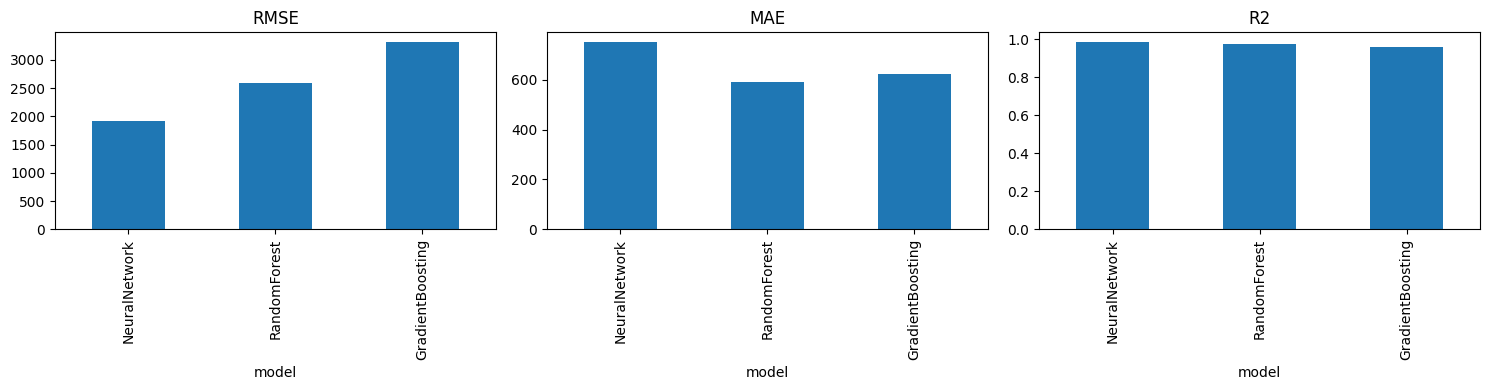

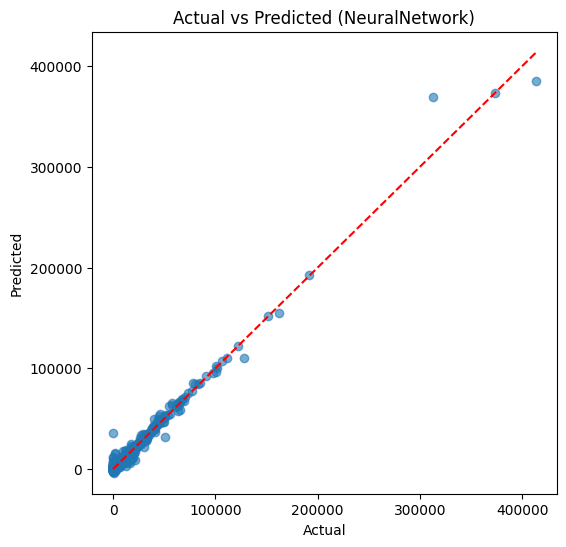

In [146]:
# Save results
res_df.to_csv("model_comparison.csv", index=False)

# Plot metrics
fig, ax = plt.subplots(1,3, figsize=(15,4))
res_df.plot(kind='bar', x='model', y='rmse', ax=ax[0], legend=False); ax[0].set_title('RMSE')
res_df.plot(kind='bar', x='model', y='mae', ax=ax[1], legend=False); ax[1].set_title('MAE')
res_df.plot(kind='bar', x='model', y='r2', ax=ax[2], legend=False); ax[2].set_title('R2')
plt.tight_layout()
plt.show()

# Actual vs Predicted ของโมเดลที่ดีที่สุด (เลือกจาก R² สูงสุด)
best_row = res_df.sort_values(by="r2", ascending=False).iloc[0]
best_name = best_row['model']
best_model = best_models[best_name]
y_pred = best_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted ({best_name})')
plt.show()

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Top 10 Features:
                       Feature  Importance
0                  ปริมาณ(ตัน)    1.597870
96      ชนิดสัตว์น้ำ_หมึกกล้วย    0.801059
92          ชนิดสัตว์น้ำ_ปูม้า    0.320305
81        ชนิดสัตว์น้ำ_ปลาเป็ด    0.264892
79      ชนิดสัตว์น้ำ_ปลาอินทรี    0.132968
44     ชนิดสัตว์น้ำ_กุ้งแชบ๊วย    0.106334
51       ชนิดสัตว์น้ำ_ปลากะตัก    0.075253
66          ชนิดสัตว์น้ำ_ปลาทู    0.071050
61     ชนิดสัตว์น้ำ_ปลาดาบเงิน    0.068388
26  เครื่องมือ_เครื่องมืออื่นๆ    0.062645


C:\Users\Win11\AppData\Local\Temp\ipykernel_12896\4054117109.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_features_df, palette="Blues_r")


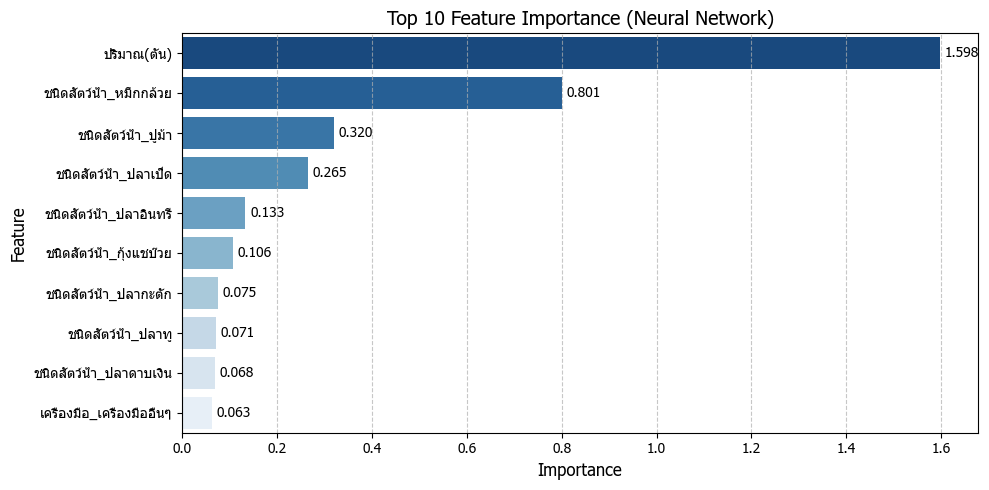

In [148]:
# ===== Top 10 Feature Importance (NN model, X_test/y_test) =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from matplotlib import rcParams

# ----------------------------
# ตั้งค่า font ให้รองรับภาษาไทย
rcParams['font.family'] = 'Tahoma'  # หรือ 'TH Sarabun New' / 'Arial Unicode MS'

# ----------------------------
# คำนวณ Permutation Importance สำหรับ Neural Network
result = permutation_importance(
    nn_model, X_test, y_test,
    n_repeats=10, random_state=42,
    scoring='r2', n_jobs=-1
)

# ----------------------------
# สร้าง DataFrame ของฟีเจอร์ทั้งหมด
fi_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean
}).sort_values("Importance", ascending=False)

# ดู Top 10 ฟีเจอร์
top_n = 10
top_features_df = fi_df.head(top_n)
print("\nTop 10 Features:")
print(top_features_df)

# ----------------------------
# วาดกราฟ Top 10 ฟีเจอร์
plt.figure(figsize=(10, top_n * 0.5))
sns.barplot(x="Importance", y="Feature", data=top_features_df, palette="Blues_r")

# ใส่ค่าตัวเลขบนบาร์
for i, v in enumerate(top_features_df["Importance"]):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')

plt.title(f'Top {top_n} Feature Importance (Neural Network)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
